<a href="https://colab.research.google.com/github/thaiassiaht/Detecting-depression-in-university-students-using-machine-learning./blob/main/Models/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Bibliotecas**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings("ignore")


## **Carregar o DataSet**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
caminho = '/content/drive/MyDrive/student_depression_dataset_clean-1.csv'
df = pd.read_csv(caminho)
#print(df.head())
print("\nColunas disponíveis:", list(df.columns))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Colunas disponíveis: ['original_index', 'Gender', 'Age', 'Profession', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Work/Study Hours', 'Financial Stress', 'Family History of Mental Illness', 'Depression']



## **MLP 1 e K-fold**



In [ ]:
target_col = 'Depression'
X = df.drop(target_col, axis=1)
y = df[target_col]

if y.dtype == 'object':
    y = LabelEncoder().fit_transform(y)
X = pd.get_dummies(X, drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

mlp1 = MLPClassifier(hidden_layer_sizes=(32,16),
                     activation='relu',
                     learning_rate_init= 0.001,
                     batch_size=32,
                     max_iter=25,
                     random_state=42)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

acc_scores = []
prec_scores = []
rec_scores = []
f1_scores = []

for train_idx, test_idx in kfold.split(X_scaled, y):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    mlp1.fit(X_train, y_train)
    y_pred = mlp1.predict(X_test)

    acc_scores.append(accuracy_score(y_test, y_pred))
    prec_scores.append(precision_score(y_test, y_pred))
    rec_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

print("== MLP1 (32, 16) com 5 repetições de K-Fold ==")
print(f"Total de amostras consideradas: {len(X)}")
print(f"Média geral da Acurácia: {np.mean(acc_scores)*100:.2f}%")
print(f"Média geral da Precisão: {np.mean(prec_scores)*100:.2f}%")
print(f"Média geral do Recall:   {np.mean(rec_scores)*100:.2f}%")
print(f"Média geral do F-Score:  {np.mean(f1_scores)*100:.2f}%")
print(f"Desvio padrão da Acurácia: {np.std(acc_scores)*100:.2f}%")

== MLP1 (32, 16) com 5 repetições de K-Fold ==
Total de amostras consideradas: 27837
Média geral da Acurácia: 83.98%
Média geral da Precisão: 85.79%
Média geral do Recall:   87.04%
Média geral do F-Score:  86.41%
Desvio padrão da Acurácia: 0.42%


## **MLP2 e K-Fold**

In [ ]:
target_col = 'Depression'
X = df.drop(columns=[target_col])
y = df[target_col]

if y.dtype == 'object':
    y = LabelEncoder().fit_transform(y)
X = pd.get_dummies(X, drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

mlp2 = MLPClassifier(hidden_layer_sizes=(64,32),
                     activation='tanh',
                     learning_rate_init=0.001,
                     batch_size=64,
                     max_iter=25,
                     random_state=42)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

acc_scores, prec_scores, rec_scores, f1_scores = [], [], [], []

for train_idx, test_idx in kfold.split(X_scaled, y):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    mlp2.fit(X_train, y_train)
    y_pred = mlp2.predict(X_test)

    acc_scores.append(accuracy_score(y_test, y_pred))
    prec_scores.append(precision_score(y_test, y_pred))
    rec_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

print("== MLP2 (64,32) com 5 repetições de K-Fold ==")
print(f"Total de amostras consideradas: {len(X)}")
print(f"Média geral da Acurácia: {np.mean(acc_scores)*100:.2f}%")
print(f"Média geral da Precisão: {np.mean(prec_scores)*100:.2f}%")
print(f"Média geral do Recall:   {np.mean(rec_scores)*100:.2f}%")
print(f"Média geral do F-Score:  {np.mean(f1_scores)*100:.2f}%")
print(f"Desvio padrão da Acurácia: {np.std(acc_scores)*100:.2f}%")

== MLP2 (64,32) com 5 repetições de K-Fold ==
Total de amostras consideradas: 27837
Média geral da Acurácia: 83.52%
Média geral da Precisão: 85.10%
Média geral do Recall:   87.09%
Média geral do F-Score:  86.08%
Desvio padrão da Acurácia: 0.50%


## **MLP 3 e K-fold**

In [ ]:
target_col = 'Depression'
X = df.drop(columns=[target_col])
y = df[target_col]

if y.dtype == 'object':
    y = LabelEncoder().fit_transform(y)
X = pd.get_dummies(X, drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



mlp3 = MLPClassifier(hidden_layer_sizes=(128,64,32),
                     activation='logistic',
                     learning_rate_init=0.001,
                     batch_size=128,
                     max_iter=30,
                     random_state=42)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

acc_scores, prec_scores, rec_scores, f1_scores = [], [], [], []

for train_idx, test_idx in kfold.split(X_scaled, y):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    mlp3.fit(X_train, y_train)
    y_pred = mlp3.predict(X_test)

    acc_scores.append(accuracy_score(y_test, y_pred))
    prec_scores.append(precision_score(y_test, y_pred, zero_division=0))
    rec_scores.append(recall_score(y_test, y_pred, zero_division=0))
    f1_scores.append(f1_score(y_test, y_pred, zero_division=0))

print("== MLP3 (128,64,32) com 5 repetições de K-Fold ==")
print(f"Total de amostras consideradas: {len(X)}")
print(f"Média geral da Acurácia: {np.mean(acc_scores)*100:.2f}%")
print(f"Média geral da Precisão: {np.mean(prec_scores)*100:.2f}%")
print(f"Média geral do Recall:   {np.mean(rec_scores)*100:.2f}%")
print(f"Média geral do F-Score:  {np.mean(f1_scores)*100:.2f}%")
print(f"Desvio padrão da Acurácia: {np.std(acc_scores)*100:.2f}%")

== MLP3 (128,64,32) com 5 repetições de K-Fold ==
Total de amostras consideradas: 27837
Média geral da Acurácia: 84.64%
Média geral da Precisão: 85.41%
Média geral do Recall:   88.95%
Média geral do F-Score:  87.14%
Desvio padrão da Acurácia: 0.55%


## **Resultados dos Modelos**

# Usando o gridsearchcv


In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split, learning_curve
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import numpy as np

# Assuming 'df' is loaded from earlier cells '_KPoHEAD1RlJ'
# Re-running the data preparation steps to ensure X_scaled and y are defined
target_col = 'Depression'
X = df.drop(columns=[target_col])
y = df[target_col]

if y.dtype == 'object':
    y = LabelEncoder().fit_transform(y)
X = pd.get_dummies(X, drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets for GridSearchCV and learning curve
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


mlp_base = MLPClassifier(random_state=42, max_iter=30)

param_grid = {
    'hidden_layer_sizes': [(64,32)],
    'activation': ['relu', 'logistic'],
    'learning_rate_init': [0.001],
    'batch_size': [32, 64, 128],
    'max_iter': [100],

}

grid_search = GridSearchCV(estimator=mlp_base,
                           param_grid=param_grid,
                           cv=3,
                           scoring='recall',
                           n_jobs=-1
                           )

grid_search.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=30, random_state=42),
             n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'batch_size': [32, 64, 128],
                         'hidden_layer_sizes': [(64, 32)],
                         'learning_rate_init': [0.001], 'max_iter': [100]},
             scoring='recall')

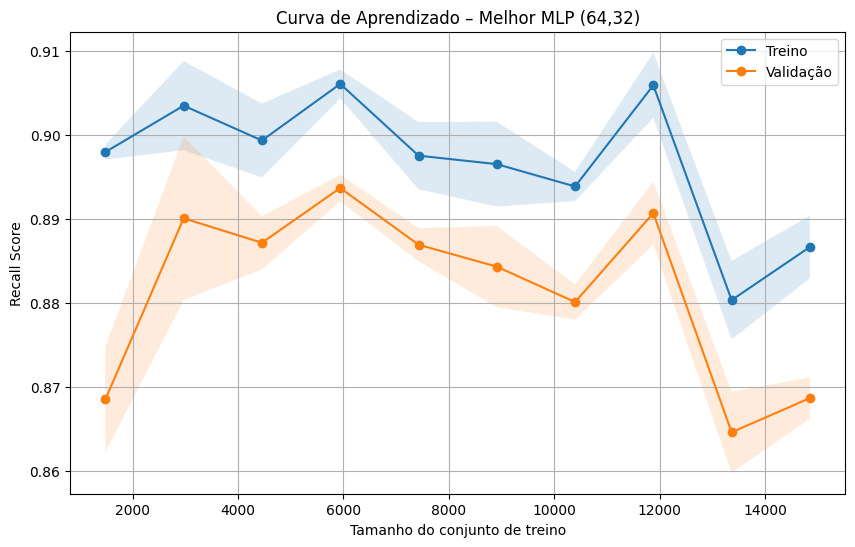

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

best_estimator = MLPClassifier(
    activation = 'logistic',batch_size = 128,
    hidden_layer_sizes = (64,32),
    max_iter = 100,
    random_state = 42
)

train_sizes, train_scores, test_scores = learning_curve(
    best_estimator, X_train, y_train, cv=3, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='recall')

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_mean, 'o-', label="Treino")
plt.plot(train_sizes, test_mean, 'o-', label="Validação")

plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.15)
plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, alpha=0.15)

plt.title("Curva de Aprendizado – Melhor MLP (64,32)")
plt.xlabel("Tamanho do conjunto de treino")
plt.ylabel("Recall Score")
plt.grid(True)
plt.legend()
plt.show()

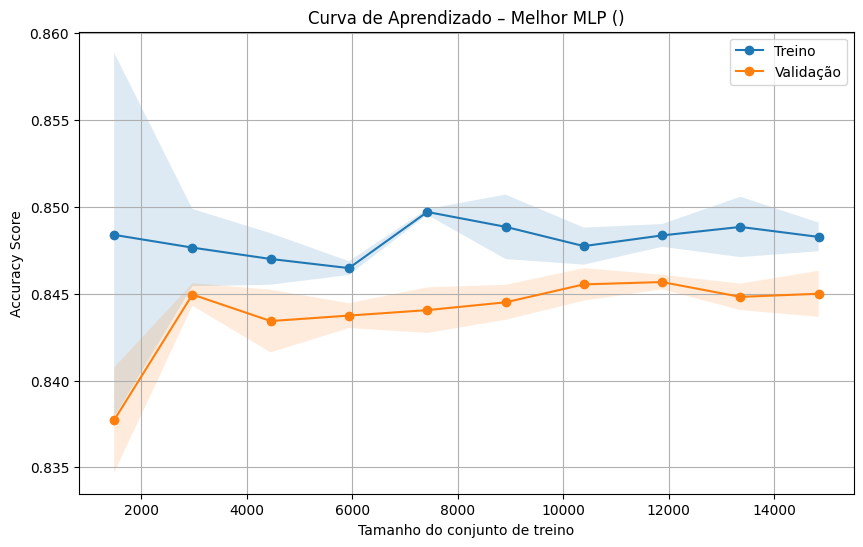

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

best_estimator = MLPClassifier(
    activation = 'logistic',batch_size = 64,
    hidden_layer_sizes = (64,32),
    max_iter = 100,
    random_state = 42
)

train_sizes, train_scores, test_scores = learning_curve(
    best_estimator, X_train, y_train, cv=3, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_mean, 'o-', label="Treino")
plt.plot(train_sizes, test_mean, 'o-', label="Validação")

plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.15)
plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, alpha=0.15)

plt.title("Curva de Aprendizado – Melhor MLP (64,32)")
plt.xlabel("Tamanho do conjunto de treino")
plt.ylabel("Accuracy Score")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
melhor_mlp = grid_search.best_estimator_
print("melhor score de recall (da validação): ", grid_search.best_score_*100)
print(f"melhores parametros: {grid_search.best_params_}")

melhor score de recall (da validação):  86.8707796193984
melhores parametros: {'activation': 'logistic', 'batch_size': 128, 'hidden_layer_sizes': (64, 32), 'learning_rate_init': 0.001, 'max_iter': 100}


In [ ]:
# O método .score() calcula a acurácia
acuracia_final = melhor_mlp.score(X_test, y_test)

print(f"Acurácia final no Conjunto de Teste: {acuracia_final*100:.2f}%")

Acurácia final no Conjunto de Teste: 83.91%


=== Tabela Comparativa dos Modelos ===
                   Modelo  Acurácia (%)  Precisão (%)  Recall (%)  F-Score (%)  Desvio Padrão Acurácia (%)
        MLP1 (32,16) ReLU         82.65         84.47       86.21        85.32                        0.87
        MLP2 (64,32) Tanh         80.74         83.28       83.94        83.60                        0.59
MLP3 (128,64,32) Logistic         84.64         85.41       88.95        87.14                        0.55


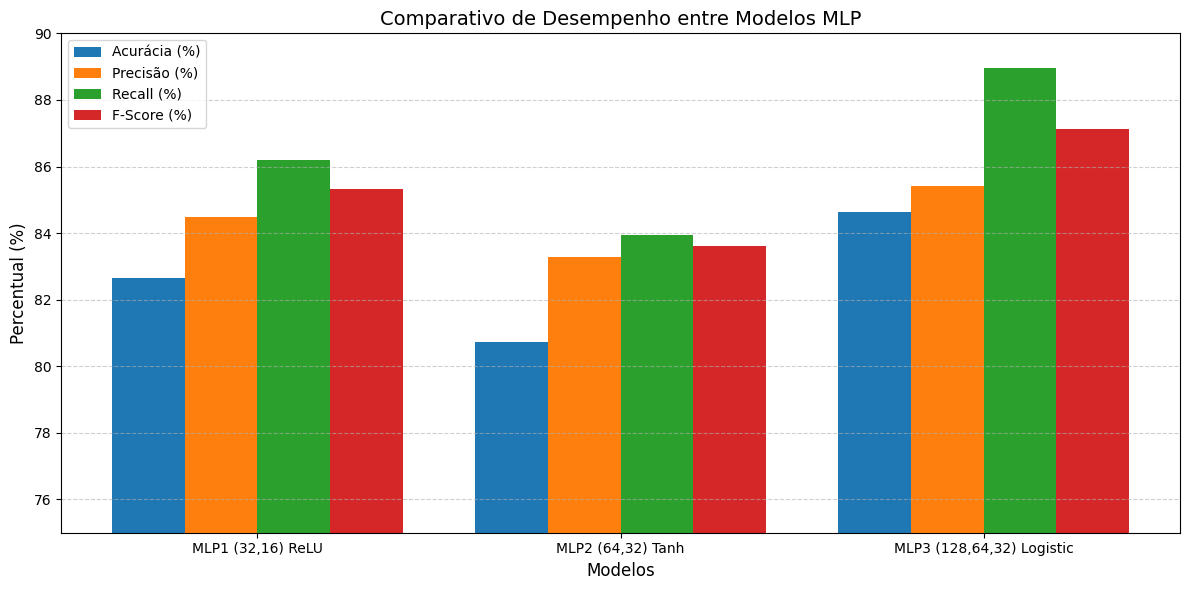

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

dados = {
    "Modelo": ["MLP1 (32,16) ReLU", "MLP2 (64,32) Tanh", "MLP3 (128,64,32) Logistic"],
    "Acurácia (%)": [82.65, 80.74, 84.64],
    "Precisão (%)": [84.47, 83.28, 85.41],
    "Recall (%)": [86.21, 83.94, 88.95],
    "F-Score (%)": [85.32, 83.60, 87.14],
    "Desvio Padrão Acurácia (%)": [0.87, 0.59, 0.55]
}

df = pd.DataFrame(dados)
print("=== Tabela Comparativa dos Modelos ===")
print(df.to_string(index=False))

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))

metricas = ["Acurácia (%)", "Precisão (%)", "Recall (%)", "F-Score (%)"]
x = np.arange(len(df["Modelo"]))  # posições no eixo X
largura = 0.2  # largura de cada barra

for i, metrica in enumerate(metricas):
    plt.bar(x + i*largura, df[metrica], width=largura, label=metrica)

plt.title("Comparativo de Desempenho entre Modelos MLP", fontsize=14)
plt.xlabel("Modelos", fontsize=12)
plt.ylabel("Percentual (%)", fontsize=12)
plt.xticks(x + largura * 1.5, df["Modelo"])  # centralizar rótulos
plt.ylim(75, 90)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


# **Comparativo entre os 3 modelos**

===== TABELA COMPARATIVA ENTRE MODELOS DE ML =====
          Modelo  Acurácia (%)  Precisão (%)  Recall (%)  F1-Score (%)  Desvio Acurácia (%)  Tempo (s)
       KNN (k=3)         80.61         80.19       79.61         79.85                 0.30      23.49
       KNN (k=5)         82.14         81.90       81.03         81.37                 0.39      20.82
       KNN (k=7)         82.79         82.61       81.68         82.04                 0.41      18.73
      SVM Linear         84.63         84.39       83.78         84.03                 0.75     479.70
        SVM Poly         84.15         84.18       82.96         83.41                 0.69     144.43
         SVM RBF         84.48         84.46       83.37         83.78                 0.63     171.55
    MLP1 (32,16)         83.98         85.79       87.04         86.41                 0.42        NaN
    MLP2 (64,32)         83.52         85.10       87.09         86.08                 0.50        NaN
MLP3 (128,64,32)      

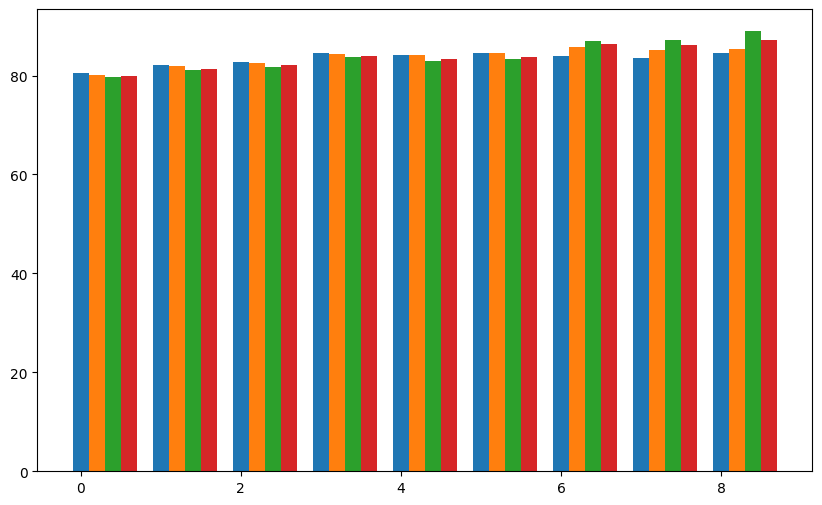

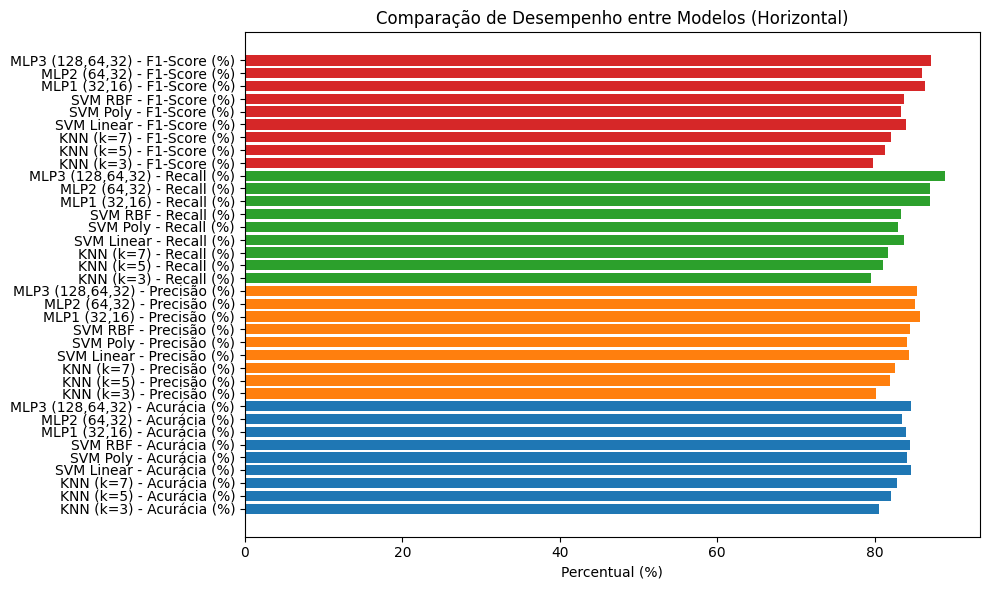

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


dados = {
    'Modelo': [
        'KNN (k=3)', 'KNN (k=5)', 'KNN (k=7)',
        'SVM Linear', 'SVM Poly', 'SVM RBF',
        'MLP1 (32,16)', 'MLP2 (64,32)', 'MLP3 (128,64,32)'
    ],
    'Acurácia (%)': [80.61, 82.14, 82.79, 84.63, 84.15, 84.48, 83.98, 83.52, 84.64],
    'Precisão (%)': [80.19, 81.90, 82.61, 84.39, 84.18, 84.46, 85.79, 85.10, 85.41],
    'Recall (%)':   [79.61, 81.03, 81.68, 83.78, 82.96, 83.37, 87.04, 87.09, 88.95],
    'F1-Score (%)': [79.85, 81.37, 82.04, 84.03, 83.41, 83.78, 86.41, 86.08, 87.14],
    'Desvio Acurácia (%)': [0.30, 0.39, 0.41, 0.75, 0.69, 0.63, 0.42, 0.50, 0.55],
    'Tempo (s)': [23.49, 20.82, 18.73, 479.70, 144.43, 171.55, None, None, None]
}

df = pd.DataFrame(dados)
print("===== TABELA COMPARATIVA ENTRE MODELOS DE ML =====")
print(df.to_string(index=False))

import numpy as np
import matplotlib.pyplot as plt

# Lista de métricas
metricas = ['Acurácia (%)', 'Precisão (%)', 'Recall (%)', 'F1-Score (%)']

# Quantidade de modelos
x = np.arange(len(df['Modelo']))

# Largura de cada barra
largura = 0.2

plt.figure(figsize=(10, 6))

# Criar barras para cada métrica
for i, metrica in enumerate(metricas):
    plt.bar(x + i*largura, df[metrica], width=largura, label=metrica)

plt.figure(figsize=(10,6))

for i, metrica in enumerate(metricas):
    plt.barh(df["Modelo"] + " - " + metrica, df[metrica])

plt.xlabel("Percentual (%)")
plt.title("Comparação de Desempenho entre Modelos (Horizontal)")
plt.tight_layout()
plt.show()

